In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from pandas_datareader import data
import matplotlib.pyplot as plt

In [ ]:
start_date = '2010-01-01'
end_date = '2020-11-07'
stock = 'AMZN'

In [7]:
stock_l = stock.lower()
SRC_DATA_FILENAME=f'{stock_l}_data.pkl'

try:
  stock_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  stock_data2 = data.DataReader(stock, 'yahoo', start_date, end_date)
  stock_data2.to_pickle(SRC_DATA_FILENAME)

In [8]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [11]:
adf_test(stock_data2.High)

Test Statistic               1.634971
p-value                      0.997959
# of Lags Used               7.000000
# of Observations Used    1340.000000
Critical Value (1%)         -3.435239
Critical Value (5%)         -2.863699
Critical Value (10%)        -2.567920
dtype: float64

In [12]:
def kpss_test(x, h0_type='c'):

    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [14]:
kpss_test(stock_data2.High)

C:\Users\emota\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\emota\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic            4.843827
p-value                   0.010000
# of Lags                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

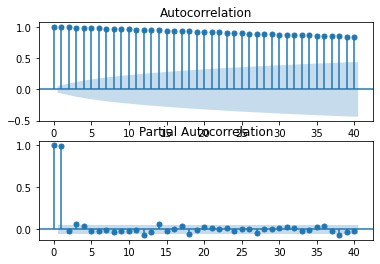

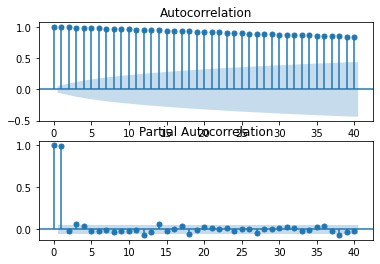

In [17]:
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(stock_data2.High, ax=ax[0], lags=N_LAGS, 
         alpha=SIGNIFICANCE_LEVEL)
plot_pacf(stock_data2.High, ax=ax[1], lags=N_LAGS, 
          alpha=SIGNIFICANCE_LEVEL)